In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
max_results = pd.read_csv("model_comparison_max.csv")
min_results = pd.read_csv("model_comparison_min.csv")
mean_results = pd.read_csv("model_comparison_mean.csv")
stddev_results = pd.read_csv("model_comparison_stddev.csv")
org_results=pd.read_csv("model_comparison_original.csv")

# Add a column to identify preprocessing type
max_results['Preprocessing'] = 'Max'
min_results['Preprocessing'] = 'Min'
mean_results['Preprocessing'] = 'Mean'
stddev_results['Preprocessing'] = 'Standard Deviation'
org_results['Preprocessing']= 'Original'
# Combine all results into one DataFrame
all_results = pd.concat([max_results, min_results, mean_results, stddev_results,org_results], ignore_index=True)


In [5]:
print(all_results.info())
print(all_results.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          40 non-null     object 
 1   Accuracy       40 non-null     float64
 2   Precision      35 non-null     float64
 3   Recall         35 non-null     float64
 4   F1-score       35 non-null     float64
 5   AUC            40 non-null     float64
 6   Time (s)       40 non-null     float64
 7   Preprocessing  40 non-null     object 
dtypes: float64(6), object(2)
memory usage: 2.6+ KB
None
                      Model  Accuracy  Precision    Recall  F1-score  \
0       Logistic Regression  0.719629   0.757388  0.848152  0.799983   
1    Support Vector Machine  0.741987   0.759695  0.892385  0.820607   
2  Decision Tree Classifier  0.673572   0.754069  0.751086  0.752161   
3    Naïve Bayes Classifier  0.718269   0.789832  0.782777  0.786047   
4  One-Class Classification  0.580099    

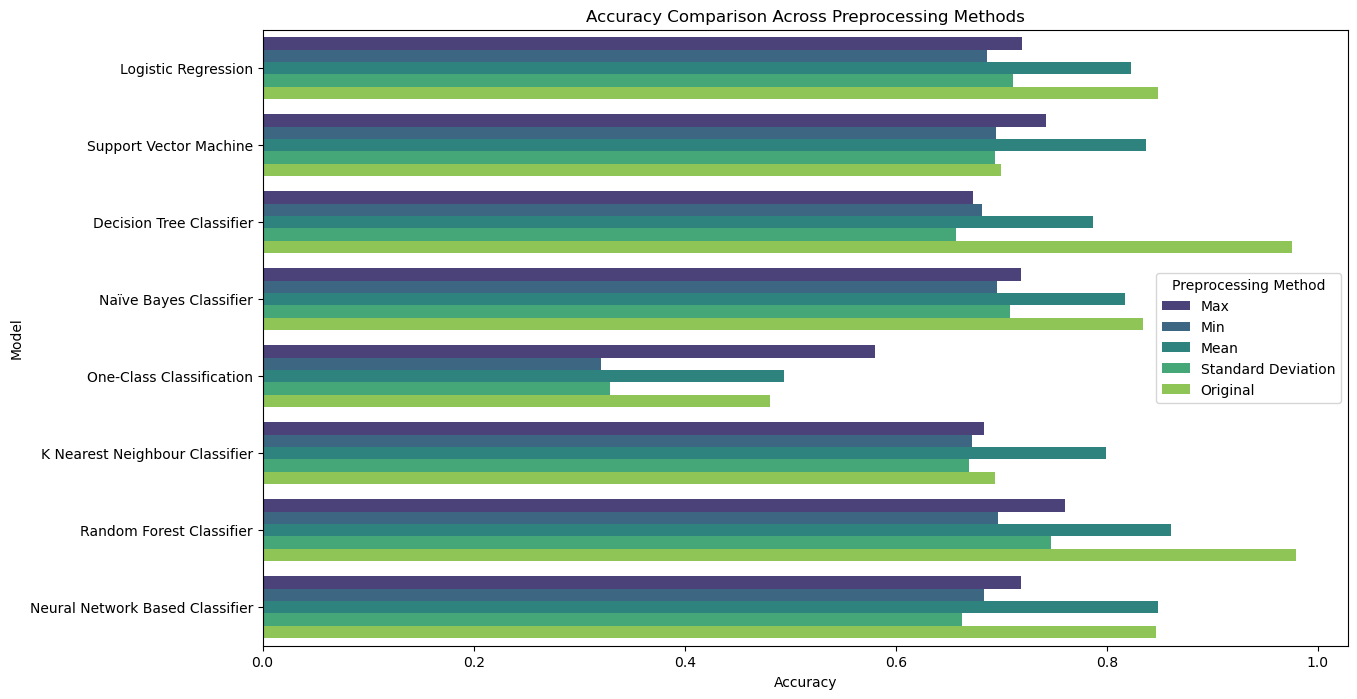

In [6]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Accuracy", y="Model", hue="Preprocessing", data=all_results, palette="viridis")
plt.title("Accuracy Comparison Across Preprocessing Methods")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.legend(title="Preprocessing Method")
plt.show()


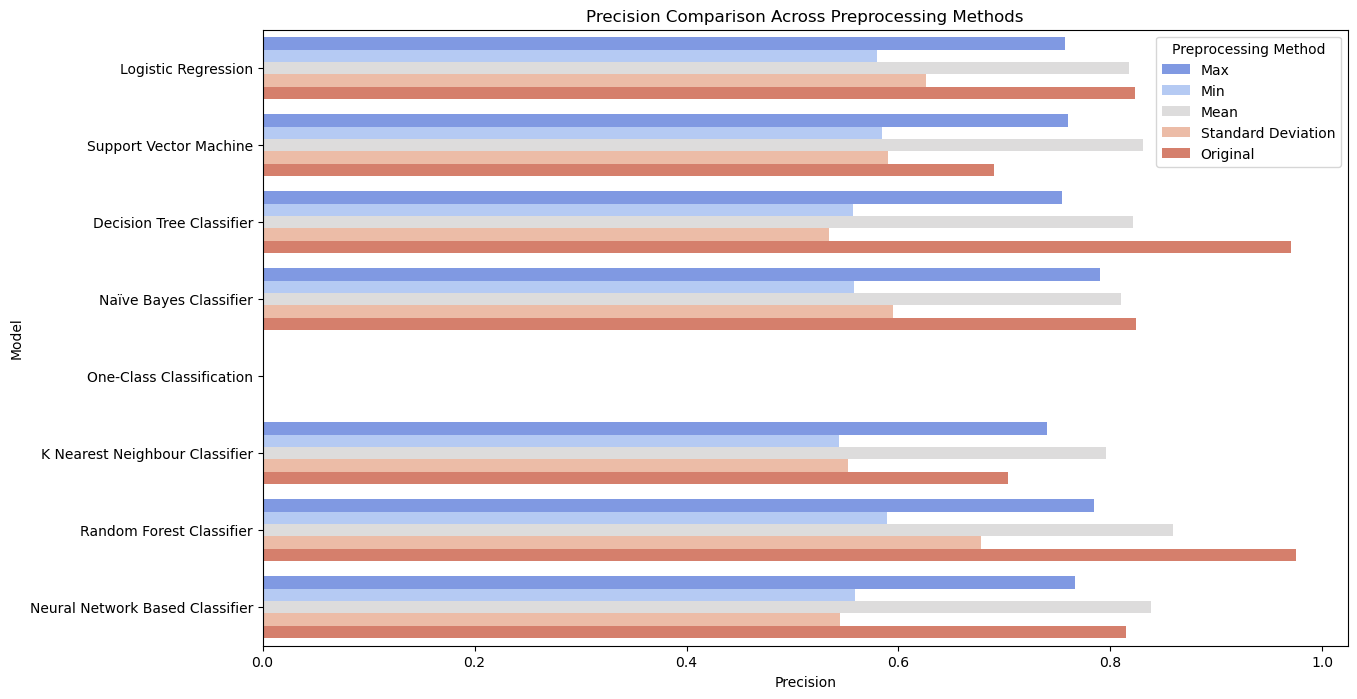

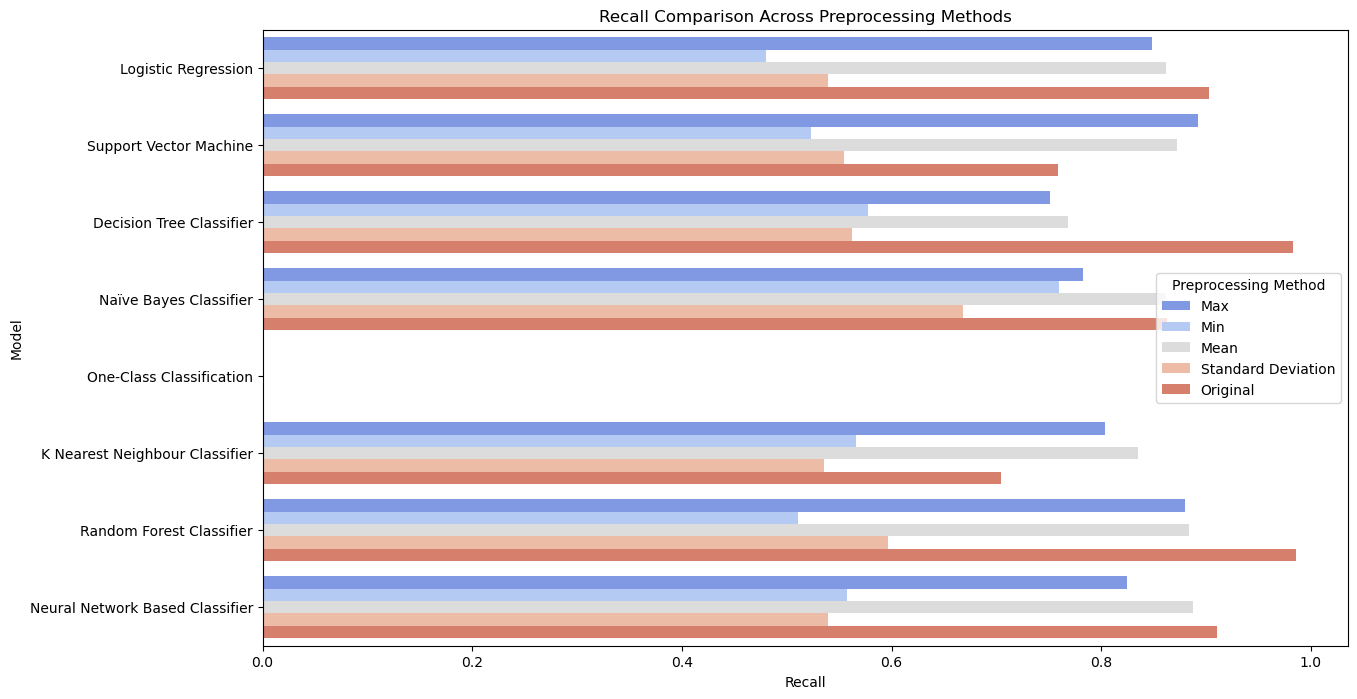

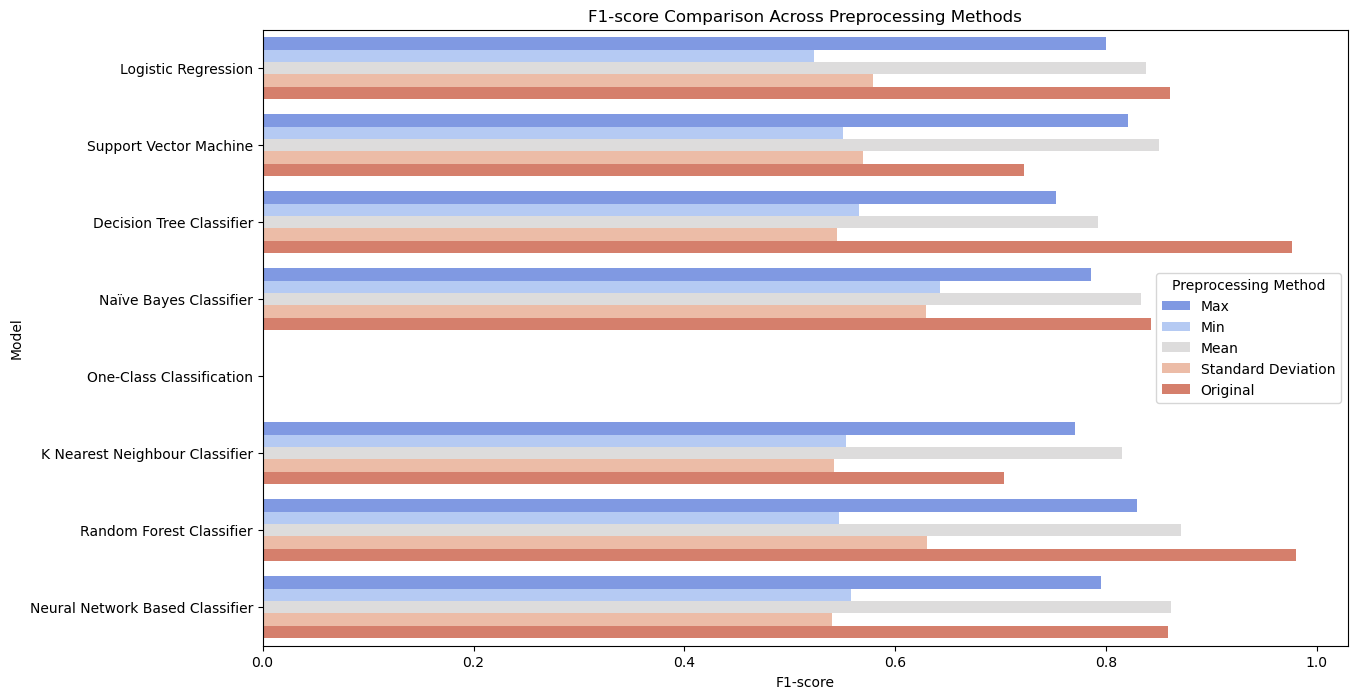

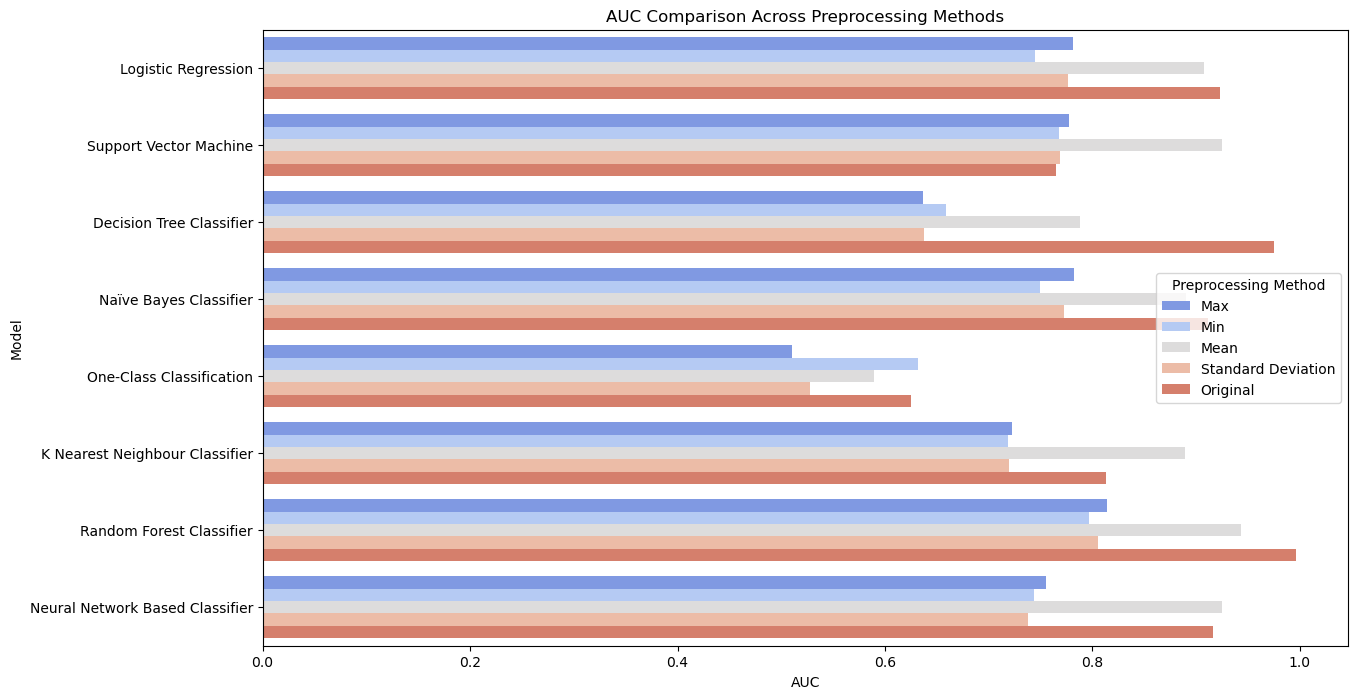

In [7]:
metrics = ['Precision', 'Recall', 'F1-score', 'AUC']

for metric in metrics:
    plt.figure(figsize=(14, 8))
    sns.barplot(x=metric, y="Model", hue="Preprocessing", data=all_results, palette="coolwarm")
    plt.title(f"{metric} Comparison Across Preprocessing Methods")
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.legend(title="Preprocessing Method")
    plt.show()


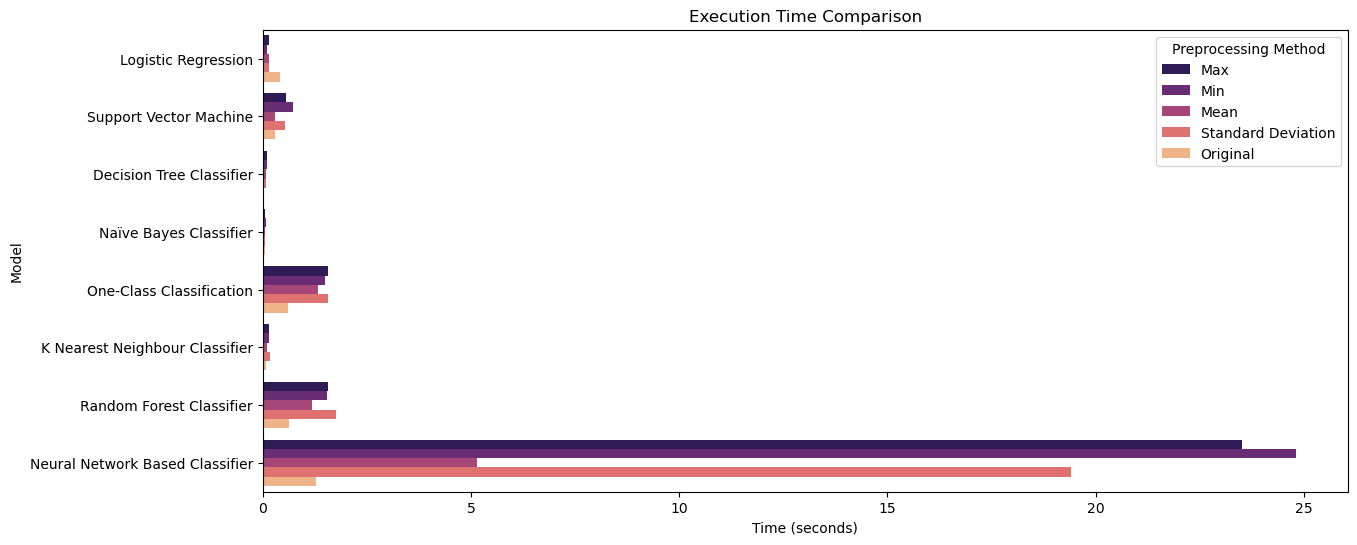

In [8]:
plt.figure(figsize=(14, 6))
sns.barplot(x="Time (s)", y="Model", hue="Preprocessing", data=all_results, palette="magma")
plt.title("Execution Time Comparison")
plt.xlabel("Time (seconds)")
plt.ylabel("Model")
plt.legend(title="Preprocessing Method")
plt.show()


In [9]:
# Add a rank column based on accuracy
all_results['Rank'] = all_results.groupby('Preprocessing')['Accuracy'].rank(ascending=False)

# Print top-performing models for each preprocessing
for method in all_results['Preprocessing'].unique():
    print(f"Top Models for {method} Preprocessing:")
    print(all_results[all_results['Preprocessing'] == method].sort_values('Rank').head())
    print("\n")


Top Models for Max Preprocessing:
                             Model  Accuracy  Precision    Recall  F1-score  \
6         Random Forest Classifier  0.760082   0.784078  0.879754  0.829020   
1           Support Vector Machine  0.741987   0.759695  0.892385  0.820607   
0              Logistic Regression  0.719629   0.757388  0.848152  0.799983   
7  Neural Network Based Classifier  0.718318   0.767052  0.824927  0.794830   
3           Naïve Bayes Classifier  0.718269   0.789832  0.782777  0.786047   

        AUC   Time (s) Preprocessing  Rank  
6  0.813844   1.568387           Max   1.0  
1  0.776992   0.549338           Max   2.0  
0  0.781686   0.155622           Max   3.0  
7  0.755091  23.520688           Max   4.0  
3  0.782201   0.063065           Max   5.0  


Top Models for Min Preprocessing:
                              Model  Accuracy  Precision    Recall  F1-score  \
14         Random Forest Classifier  0.697280   0.589365  0.511161  0.546513   
11           Naïve Bayes 

In [10]:
# Print top-performing models for each preprocessing
for method in all_results['Preprocessing'].unique():
    print(f"Top Models for {method} Preprocessing:")
    print(all_results[all_results['Preprocessing'] == method].sort_values('Rank').head())
    print("\n")


# Display confusion matrices for each preprocessing type
preprocessing_types = {
    'Max': max_results,
    'Min': min_results,
    'Mean': mean_results,
    'Standard Deviation': stddev_results,
    'Original': org_results
}

for preprocessing, df in preprocessing_types.items():
    # Assuming y_true and y_pred are in the DataFrame
    if 'y_true' in df.columns and 'y_pred' in df.columns:
        y_true = df['y_true']
        y_pred = df['y_pred']

        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Display the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix for {preprocessing} Preprocessing")
        plt.show()

Top Models for Max Preprocessing:
                             Model  Accuracy  Precision    Recall  F1-score  \
6         Random Forest Classifier  0.760082   0.784078  0.879754  0.829020   
1           Support Vector Machine  0.741987   0.759695  0.892385  0.820607   
0              Logistic Regression  0.719629   0.757388  0.848152  0.799983   
7  Neural Network Based Classifier  0.718318   0.767052  0.824927  0.794830   
3           Naïve Bayes Classifier  0.718269   0.789832  0.782777  0.786047   

        AUC   Time (s) Preprocessing  Rank  
6  0.813844   1.568387           Max   1.0  
1  0.776992   0.549338           Max   2.0  
0  0.781686   0.155622           Max   3.0  
7  0.755091  23.520688           Max   4.0  
3  0.782201   0.063065           Max   5.0  


Top Models for Min Preprocessing:
                              Model  Accuracy  Precision    Recall  F1-score  \
14         Random Forest Classifier  0.697280   0.589365  0.511161  0.546513   
11           Naïve Bayes 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from tkinter import ttk

# Set up the main GUI window
master = Tk()
master.title("Model Comparison Results")

# Function to update the results display based on preprocessing type
def show_results(preprocessing_type):
    # Filter results based on the selected preprocessing type
    filtered_results = all_results[all_results['Preprocessing'] == preprocessing_type]
    
    # Clear existing treeview
    for row in tree.get_children():
        tree.delete(row)
    
    # Add new filtered results to the treeview
    for index, row in filtered_results.iterrows():
        tree.insert("", "end", values=(
            row['Model'], row['Accuracy'], row['Precision'], row['Recall'], 
            row['F1-score'], row['AUC'], row['Rank']
        ))

# Function to plot a bar chart of accuracy for selected preprocessing
def plot_accuracy(preprocessing_type):
    # Filter data based on preprocessing type
    filtered_results = all_results[all_results['Preprocessing'] == preprocessing_type]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_results, x='Model', y='Accuracy', hue='Preprocessing')
    plt.title(f'Accuracy of Models for {preprocessing_type} Preprocessing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create a dropdown menu to select preprocessing type
Label(master, text="Select Preprocessing Type", font=("Arial", 14)).grid(row=0, column=0, pady=10)
preprocessing_types = ['Max', 'Min', 'Mean', 'Standard Deviation', 'Original']
preprocessing_var = StringVar(master)
preprocessing_var.set(preprocessing_types[0])  # Default value

preprocessing_menu = OptionMenu(master, preprocessing_var, *preprocessing_types)
preprocessing_menu.grid(row=0, column=1)

# Button to update the results based on selected preprocessing
Button(master, text="Show Results", command=lambda: show_results(preprocessing_var.get()), font=("Arial", 12)).grid(row=1, columnspan=2, pady=10)

# Button to plot accuracy bar chart for selected preprocessing
Button(master, text="Plot Accuracy", command=lambda: plot_accuracy(preprocessing_var.get()), font=("Arial", 12)).grid(row=2, columnspan=2, pady=10)

# Treeview to display the comparison results
columns = ("Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC", "Rank")
tree = ttk.Treeview(master, columns=columns, show="headings", height=10)
for col in columns:
    tree.heading(col, text=col)
tree.grid(row=3, column=0, columnspan=2, pady=10)

# Initialize with the first preprocessing type (Max) results
show_results('Max')

# Run the GUI loop
master.mainloop()
